### 합성곱 신경망 만들기

In [1]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = data.load_data()

X_train = X_train.reshape(60000, 28, 28, 1) # 컬러 차원을 추가해줘야 함
X_train = X_train / 255.0

X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test / 255.0

In [2]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# early = tf.keras.callbacks.EarlyStopping(patience=2) 
# # 콜백은 검증 세트에서 사용하므로 사용하려면 검증 데이터 넣어줘야함
# model.compile(optimizer='adam',
#              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50)

- 합성곱층의 필터크기는 보통 3x3, 5x5, 7x7 처럼 홀수 사용(위에선 3,3 으로 3x3)
- 처음 층은 인풋 크기를 지정해줘야함(이전 챕터에선 Flatten에 인풋크기 지정)

- Conv2D층은 컬러 이미지를 위해 설계되었기 떄문에 세번쨰 차원을 1로 해야함(컬러 채널, 차원)
    - 컬러 이미지는 r,g,b 세개이므로 세번째 차원은 3이 된다
    
- 2x2 최대풀링 사용

- Flatten은 Dense 층에 전달하기 전에 펼치는 용도

- 합성곱층을 먼저 통과시키고 **Dense 층(심층신경망, DNN)** 으로 전달

확실히 정확도 높아짐

In [3]:
# model.evaluate(X_test, y_test)

In [4]:
# model.predict(X_test[:1]) # 정확히 예측

### 합성곱 신경망 살펴보기

In [5]:
# model.summary()

1. 처음에 28 x 28 크기의 이미지를 받아 64개의 필터 적용, 하지만 필터 크기가 3x3이라 이미지 경계에 있는 1픽셀을 놓치게 되고 합성곱 크기가 26x26픽셀로 줄어들게 된다
    - 5 x 5 적용하면 (a-4) x (a-4) 크기로 줄어든다

2. 풀링 크기는 2x2 이므로 절반씩 줄어 13x13 이 된다.

3. 다음 합성곱층은 이를 (13-2)x(13-2) 크기로 줄고

4. 다음 풀링에서 오른쪽과 아래쪽 가장자리 픽셀이 버려지고 이미지가 5x5가 된다

5. 이미지가 두개의 합성곱층을 통과하면 결과적으로 많은 5x5 이미지가 만들어진다.

각 합성곱은 3x3 필터와 절편을 가진다. 밀집층을 사용했을 떄 각 층은 y=mx+c 와 같다.

필터가 3x3 이기 때문에 9개의 파라미터가 있다는 것을 제외하면 이와 매우 비슷하다

1. 합성곱 필터가 64개이므로 전체 파라미터는 640개이다.(파라미터9개, 절편 1개) -> **9*64 + 64= 640**

2. 풀링 층은 파라미터 없이 크기만 줄임

3. 다음 합성곱층은 크기가 9인 64개 필터 가짐. 각 필터는 이전에 나온 64개와 곱해진다,
    - 64 * ( 64 * 9 ) + 64 = 36,928
    
4. 두번쨰 층 통과하면 이미지 크기 5x5가 되고 64개의 채널을 가진다. 이를 모두 곱하면 1600개이다. 이를 펼쳐서 129개의 뉴런을 가진 밀집층에 주입한다.

5. 128개의 뉴런은 각 가중치와 절편을 가지므로 **((5 * 5 * 64) * 128) + 128 = 204,928** 이 된다

6. 마지막 층은 10개의 뉴런으로 구성된 밀집층이다 **(128 * 10) + 10 = 1,290**

7. 전체 파라미터는 이를 모두 더한 243,786개가 된다

8. 파라미터가 많아 학습이 오래 걸리지만 더 정확한 모델을 만들 수 있다.

이 데이터는 28*28 크기의 흑백이미지이고, 중앙에 정렬되어있다. 

다음에 볼 이미지는 말과 사람의 컬러사진으로 구성된 조금 더 복잡한 데이터셋에 합성곱층을 사용해 이미지에 말이나 사람이 포함되어있는지 구별해보겠다

또한 이 데이터셋은 중앙에 이미지가 정렬되어있지 않다. 그러므로 합성곱층을 사용해 특징을 잡아내야 한다.

### 말과 사람을 구별하는 CNN 만들기
보통 데이터는 레이블을 제공 안하는 경우도 많다. 이것도 그렇다.

레이블 대신 이미지가 디렉터리에 종류별로 나눠져있고, 케라스의 **ImageDataGenerator**를 사용하면 디렉터리 구조를 사용해 자동으로 이미지에 레이블을 할당할 수 있다.

압축을 풀 때 디렉터리 구조로 만들어야 한다(자세한 내용은 책)

#### 데이터 준비

In [6]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = 'horse-or-human.zip'
training_dir = 'horse-or-human/training/'

urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

위 코드는 훈련데이터 ZIP 파일을 다운로드해 horse-or-human/training 디렉터리에 압축을 푼다.

이 디렉터리는 말과 사람 이미지를 담은 서브 디렉터리를 포함한다.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일링
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300,300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


먼저 **ImageDataGenerator** 객체 **train_datagen** 을 만든다.

그다음 훈련 과정 동안 디렉터리를 순회하며 이미지를 생성하는 반복자 객체 **train_generator** 를 만든다.

대상 디렉터리는 train_dir이다. 이미지 크기를 지정하는 targetsize(여기에서는 300x300)와

**레이블 종류를 지정하는 classmode(여기에서는 바이너리)** 같은 매개변수를 지정한다.

- class_mode는 여기에서처럼 이미지가 두개로 분류될 경우(말, 사람) binary 이고 **두개 이상이면 categorical** 로 지정

### 말-사람 데이터셋을 위한 CNN 구조
세가지 유의점이 있다.
1. 이미지가 300x300 픽셀로 훨씬 크기 떄문에 많은 층이 필요하다.
2. 흑백이 아니라 컬러 이미지라서 채널이 하나가 아니라 세개가 필요하다.
3. 두 종류의 이미지만 있으므로 하나의 출력 뉴런을 사용하는 이진 분류기를 만들 수 있다.
    - 이 뉴런은 한 클래스일 때는 0을, 또 다른 클래스일 때는 1에 가까운 값을 출력한다.

In [17]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#### 여기서 짚고 가야 할 부분
1. 맨처음 층은 3x3 크기의 필터 16개 사용하고 입력이미지 (300, 300, 3)
2. 마지막 출력층은 하나의 뉴런만 있음. 
    - 이진 분류기를 만들 때 하나의 뉴런 출력을 시그모이드 함수로 활성화하면 이진 분류를 얻을 수 있기 때문이다.
3. 여러개 합성곱층을 쌓았다. 
    - 입력 이미지가 꽤 크기 때문에 층을 거듭하면서 특징이 강조된 작은 이미지를 만들기 위해서이다.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

데이터가 합성곱층을 모두 통과하면 7x7 크기가 된다. 

이론적으로는 ***활성화된 특성맵*** 이라고 부르며 비교적 간단한 49개의 필셀로 구성된다.

이 특성맵을 밀집층에 전달해 적절한 레이블에 매핑 가능

- 이 신경망은 170만개 파라미터를 학습하기 때문에 엄청 오래 걸린다.

In [18]:
from keras.optimizers.legacy import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

신경망 훈련을 위해 손실함수와 옵티마이저로 컴파일.

손실함수는 이진크로스엔트로피(binary cross entropy)를 사용할 수 있다. **이름에서 알 수 있듯이 클래스가 두개인 경우 사용하는 손실함수이다**

옵티마이저 RMSprop에 학습속도를 제어하는 학습률이 있다.


앞에서 만든 training_generator를 전달해 모델을 훈련한다.

실행하려면
#### pip install Pillow

In [11]:
model.fit(train_generator, epochs=15)

Epoch 1/15
33/33 [==============================] - 10s 296ms/step - loss: 0.7644 - accuracy: 0.6378
Epoch 2/15
33/33 [==============================] - 10s 299ms/step - loss: 0.3481 - accuracy: 0.8919
Epoch 3/15
33/33 [==============================] - 10s 300ms/step - loss: 0.2231 - accuracy: 0.9328
Epoch 4/15
33/33 [==============================] - 10s 300ms/step - loss: 0.1668 - accuracy: 0.9513
Epoch 5/15
33/33 [==============================] - 10s 305ms/step - loss: 0.2365 - accuracy: 0.9679
Epoch 6/15
33/33 [==============================] - 10s 307ms/step - loss: 0.0294 - accuracy: 0.9903
Epoch 7/15
33/33 [==============================] - 10s 306ms/step - loss: 0.2273 - accuracy: 0.9805
Epoch 8/15
33/33 [==============================] - 10s 306ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 9/15
33/33 [==============================] - 10s 304ms/step - loss: 0.3780 - accuracy: 0.9757
Epoch 10/15
33/33 [==============================] - 10s 305ms/step - loss: 0.0417 - accura

텐서플로 최신 버전에선 ImageDataGenerator 대신 4장에서 배울 tf.data.Datasets 객체를 반환하는

**image_dataset_from_directory** 함수를 사용하는 것이 좋다.

이 함수에는 이미지 스케일 조정과 같은 전처리 기능이 없다. 그래서 전처리 기능은 모델 층의 일부로 추가해야 한다.

### 코드

In [16]:
# train_ds = keras.utils.image_dataset_from_directory(
#     training_dir,
#     image_size=(300, 300),
#     label_mode = 'binary'
# )

# model = keras.models.Sequential([
#     keras.layers.Rescaling(1./255, input_shape=(300,300,3)),
#     keras.layers.Conv2D(16, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Conv2D(32, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Conv2D(64, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Conv2D(64, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Conv2D(64, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

이 신경망은 15번만의 에폭만에 훈련 세트에서 98퍼센트의 매우 인상적인 정확도 달성.

물론 훈련 데이터의 성능일 뿐. 신경망이 본 적 없는 데이터에 대한 성능은 아님

제너레이터를 사용해 검증세트 추가하고 성능을 측정해 실제로 이 모델이 얼마나 잘 작동할지 보겠다.

### 검증세트 추가하기

In [69]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

validation_file_name = 'validation-horse-or-human.zip'
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()


In [70]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [19]:
model.fit(train_generator,
         epochs=15,
         validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 12s 343ms/step - loss: 0.6527 - accuracy: 0.6660 - val_loss: 0.6500 - val_accuracy: 0.8398
Epoch 2/15
33/33 [==============================] - 11s 335ms/step - loss: 0.3383 - accuracy: 0.8744 - val_loss: 0.6892 - val_accuracy: 0.8359
Epoch 3/15
33/33 [==============================] - 11s 335ms/step - loss: 0.3548 - accuracy: 0.9211 - val_loss: 0.5718 - val_accuracy: 0.8828
Epoch 4/15
33/33 [==============================] - 11s 337ms/step - loss: 0.1296 - accuracy: 0.9494 - val_loss: 1.6948 - val_accuracy: 0.7891
Epoch 5/15
33/33 [==============================] - 11s 340ms/step - loss: 0.1820 - accuracy: 0.9503 - val_loss: 3.1770 - val_accuracy: 0.7578
Epoch 6/15
33/33 [==============================] - 11s 336ms/step - loss: 0.1789 - accuracy: 0.9630 - val_loss: 6.4867 - val_accuracy: 0.5508
Epoch 7/15
33/33 [==============================] - 11s 329ms/step - loss: 0.0423 - accuracy: 0.9903 - val_loss: 2.0050 - val_accuracy: 0.8203

훈련세트에선 정확도를 거의 100퍼센트로 달성하지만 검증세트에선 88퍼센트 정도의 정확도를 가진다.

***이는 과대적합된 경우이다.***

훈련에 사용한 이미지 개수가 적고 다양한 것을 생각하면 나쁘지 않다.

하지만 데이터 부족할 때 모델 성능을 향상시킬 수 있는 몇 가지 기법이 있다. 이번 장 뒷부분에서 살펴보겠다.

### 말 또는 사람 이미지로 테스트하기

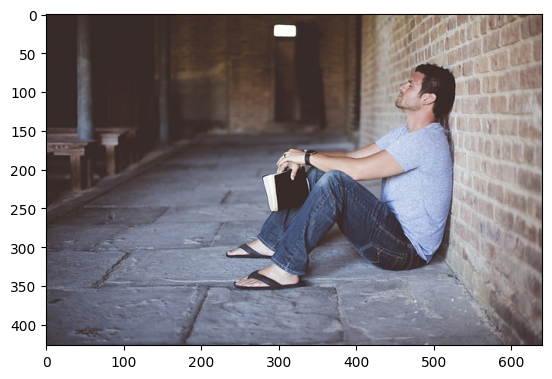

1/1 [==============================] - 0s 67ms/step
[[1.]]
모델 출력:  1.0
hh_image_1.jpg는 사람입니다.
-------------------------


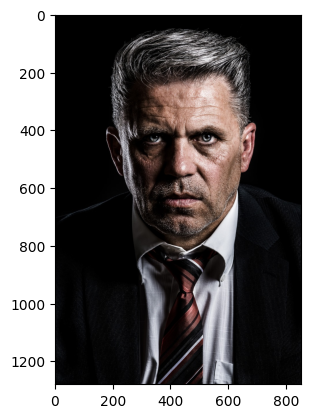

1/1 [==============================] - 0s 14ms/step
[[0.]]
모델 출력:  0.0
hh_image_2.jpg는 말입니다.
-------------------------


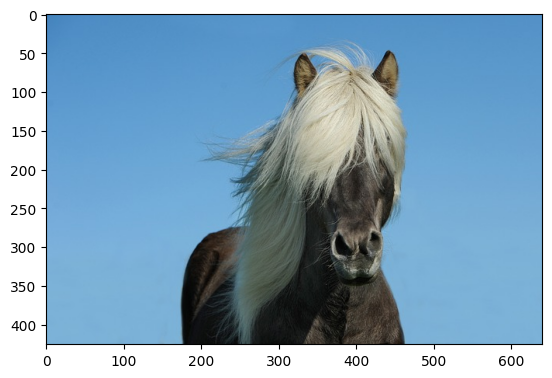

1/1 [==============================] - 0s 13ms/step
[[1.]]
모델 출력:  1.0
hh_image_3.jpg는 사람입니다.
-------------------------


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1, 4)]

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = keras.utils.load_img(fn, target_size=(300, 300)) # 특정 경로 이미지 업로드(크기는 300, 300)
    x = keras.utils.img_to_array(img) 
    x = np.expand_dims(x, axis=0) # 배열에 새로운 차원을 추가해서 3차원 배열로 만들어줌
    
    classes = model.predict(x) # 2차원배열
    # (샘플, 각 클래스에 대한 점수)
    print(classes)
    print('모델 출력: ', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + '는 사람입니다.')
    else:
        print(fn + '는 말입니다.')
    print('-------------------------')

가운데 이미지는 사람인데 말로 구분함.

-> 결과를 보니 말에 과대적합 된 거 같다. 

완벽한 자세의 사람이 아니면(전신이 드러나지 않으면) 말로 오인될 수도 있다.

첫번쨰 이미지는 전신이 보이므로 사람으로 올바르게 분류한다, 두번쨰는 상반신만 있으므로 말로 구분.

훈련 데이터에는 상반신 사진이 아닌 전신 사지만 있기 떄문에 올바르게 분류하지 못한다.

훈련세트가 모델이 실전에서 만날 수 있는 가능한 상황을 모두 나타내지는 못하므로

모델은 항상 훈련세트에 어느정도 과도하게 전문화된다.

해결책은 무엇일까?
- 확실한 건 기존에 없던 특정 자세의 사람이 담긴 사진을 훈련 데이터에 더 추가하는 것이다. 하지만 항상 가능하지는 않다.
- 다행히 텐서플로에는 가상으로 데이터셋을 확장할 수 있는 좋은 기능이 있다.(**이미지 증식이라고 한다**)

### 이미지 증식

훈련세트에 포함되지 않은 자세를 한 사람을 말이라고 잘못 분류했다. 

이런 문제를 해결하는 한 가지 방법은 **이미지 증식** 이다. 

이미지 증식은 텐서플로가 데이터를 로드할 때 이미지에 여러 변환을 적용해 새로운 데이터를 추가로 만드는 기법이다.

- 회전
- 수평 이동
- 수직 이동
- 기울임(shearing)
- 확대
- 반전

이러한 방식 사용

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300,300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


- 이미지를 왼쪽, 오른쪽으로 40도까지 랜덤하게 기울임.
- 이미지를 수직, 수평으로 20%까지 랜덤하게 이동
- 이미지를 20%까지 랜덤하게 기울임
- 이미지를 20%까지 랜덤하게 확대
- 이미지를 수평 또는 직으로 랜덤하게 뒤집음
- 이동하거나 기울인 후에 누락된 픽셀을 근처 픽셀로 채운다.

이런 매개변수로 훈련 제너레이터를 다시 만들어 훈련하면 이미지 처리 떄문에 훈련시간이 더욱 오래 걸린다.

또한 모델 정확도가 이전만큼 높지 않을 수 있다. 이전에는 대부분 균일한 데이터셋에 과대적합 되었기 떄문.


In [43]:
from tensorflow import keras

model2 = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
from keras.optimizers.legacy import RMSprop

model2.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [42]:
model2.fit(train_generator, epochs=15,
         validation_data=validation_generator)

Found 256 images belonging to 2 classes.
Epoch 1/15
33/33 [==============================] - 18s 539ms/step - loss: 0.2068 - accuracy: 0.9367 - val_loss: 2.3382 - val_accuracy: 0.5820
Epoch 2/15
33/33 [==============================] - 18s 526ms/step - loss: 0.1502 - accuracy: 0.9484 - val_loss: 3.8309 - val_accuracy: 0.5859
Epoch 3/15
33/33 [==============================] - 18s 531ms/step - loss: 0.1071 - accuracy: 0.9620 - val_loss: 1.0125 - val_accuracy: 0.7305
Epoch 4/15
33/33 [==============================] - 18s 541ms/step - loss: 0.1381 - accuracy: 0.9455 - val_loss: 1.6532 - val_accuracy: 0.7266
Epoch 5/15
33/33 [==============================] - 18s 531ms/step - loss: 0.1660 - accuracy: 0.9416 - val_loss: 1.4776 - val_accuracy: 0.7500
Epoch 6/15
33/33 [==============================] - 17s 524ms/step - loss: 0.0873 - accuracy: 0.9669 - val_loss: 1.7106 - val_accuracy: 0.6875
Epoch 7/15
33/33 [==============================] - 18s 532ms/step - loss: 0.0775 - accuracy: 0.9737 

#### 결과 보기

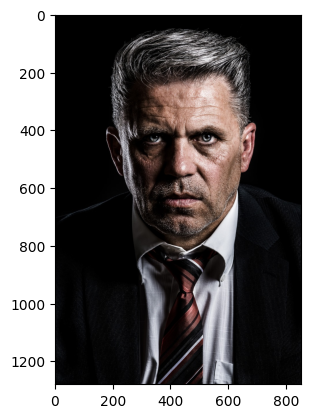

1/1 [==============================] - 0s 33ms/step
모델 출력:  1.0
hh_image_2.jpg는 사람입니다.
-------------------------


In [46]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

img = tf.keras.utils.load_img(fn, target_size=(300, 300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model2.predict(x)

print('모델 출력: ', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + '는 사람입니다.')
else:
    print(fn + '는 말입니다.')
print('-------------------------')

정확도는 낮아졌지만 올바른 출력을 내는 것을 볼 수 있음

In [47]:
model3 = keras.models.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(300,300,3)),
    keras.layers.RandomRotation(0.11, fill_mode='nearest'),
    keras.layers.RandomTranslation(0.2, 0.2, fill_mode='nearest'),
    keras.layers.RandomFlip('horizontal'),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

이렇게 데이터 전처리층을 이용해서도 가능

### 전이학습
사전 훈련된 층을 갖다가 씀

여기서 사용할 사전 훈련된 모델은 inception 버전 3의 ImageNet이다.

ImageNet 데이터베이스에 있는 수백만 개 이상의 이미지에서 훈련되었다. 수십개의 층이 있고 이미지를 천 개의 클래스로 분류 가능. 우리는 이 가중치를 업로드해올 수 있다.

In [60]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import urllib
weights_url = "http://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

weights_file = 'inception_v3.h5'
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False,
                               weights=None)
pre_trained_model.load_weights(weights_file)

In [61]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_28[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

 conv2d_39 (Conv2D)          (None, 16, 16, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 16, 16, 64)           192       ['conv2d_33[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 16, 16, 64)           192       ['conv2d_35[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 16, 16, 96)           288       ['conv2d_38[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 16, 16, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 16, 16, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 16, 16, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_56 (Conv2D)          (None, 16, 16, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 16, 16, 96)           288       ['conv2d_56[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 16, 16, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_54 (Conv2D)          (None, 7, 7, 384)            995328    ['mixed2[0][0]']              
          

 conv2d_58 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_61 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_66 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_67 (Conv2D)          (None, 7, 7, 192)            147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 7, 7, 192)            576       ['conv2d_58[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 7, 7, 768)            0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_68 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_71 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_76 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 7, 7, 768)            0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_78

 batch_normalization_62 (Ba  (None, 7, 7, 192)            576       ['conv2d_90[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 7, 7, 192)            576       ['conv2d_95[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_99 (Conv2D)          (None, 3, 3, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_103 (Conv2D)         (None, 3, 3, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 3, 3, 320)            960       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 3, 3, 192)            576       ['conv2d_103[0][0]']          
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 3, 3, 192)            576       ['conv2d_112[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

수많은 층이 있다.

mixed_7 층의 출력이 7x7로 작기 떄문에 이를 사용해보겠다.

In [62]:
for layer in pre_trained_model.layers:
    layer.trainable=False

last_layer = pre_trained_model.get_layer('mixed7')
print('마지막 층 출력의 크기', last_layer.output_shape)
last_output = last_layer.output

마지막 층 출력의 크기 (None, 7, 7, 768)


이 결과는 이미지를 주입하면 mixed 층에서 7x7 크기의 특성 맵을 출력한다는 것을 의미한다.

이 층 아래에 밀집층을 추가해준다

In [ ]:
# 출력을 펼쳐서 1차원으로 만든다.
x1 = layers.Flatten()(last_output)
# 1,204 개 은닉 유닛과 렐루 활성화 함수를 사용한 완전 연결층 추가
x2 = layers.Dense(1024, activation='relu')(x1)
# 최종 층 추가
x3 = layers.Dense(1, activation='sigmoid')(x2)


# *** x= asd()(x)
#.   x= .... 
# 이런식으로 이름을 같게 하면 오류가 나고 이름을 다르게 하면 된다!

층을 만들고 끝에 (이전 층) 을 해주면 연결해주고 Model에 (Input, output) 으로 전달하면 층이 연결된다.

사전 훈련된 모델의 입력과 x를 사용해 모델을 정의할 수 있다. 그다음 이전과 동일하게 모델을 컴파일한다.

In [78]:
from keras.optimizers.legacy import RMSprop
model4 = Model(pre_trained_model.input, x3) # 인풋층, 아웃풋 층

model4.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy',
             metrics=['accuracy'])

In [67]:
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_28[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0]

 conv2d_39 (Conv2D)          (None, 16, 16, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 16, 16, 64)           192       ['conv2d_33[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 16, 16, 64)           192       ['conv2d_35[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 16, 16, 96)           288       ['conv2d_38[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 16, 16, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 16, 16, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 16, 16, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_56 (Conv2D)          (None, 16, 16, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 16, 16, 96)           288       ['conv2d_56[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 16, 16, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_54 (Conv2D)          (None, 7, 7, 384)            995328    ['mixed2[0][0]']              
          

 conv2d_58 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_61 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_66 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_67 (Conv2D)          (None, 7, 7, 192)            147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 7, 7, 192)            576       ['conv2d_58[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 7, 7, 768)            0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_68 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_71 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_76 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 7, 7, 768)            0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_78

 batch_normalization_62 (Ba  (None, 7, 7, 192)            576       ['conv2d_90[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 7, 7, 192)            576       ['conv2d_95[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_67[0][0]
          

In [75]:

training_dir = 'horse-or-human/training/'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
model4.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
33/33 [==============================] - 11s 323ms/step - loss: 0.2498 - accuracy: 0.9309 - val_loss: 0.0334 - val_accuracy: 0.9844
Epoch 2/50
33/33 [==============================] - 10s 307ms/step - loss: 0.0449 - accuracy: 0.9834 - val_loss: 0.1617 - val_accuracy: 0.9414
Epoch 3/50
33/33 [==============================] - 10s 313ms/step - loss: 0.0516 - accuracy: 0.9815 - val_loss: 0.0208 - val_accuracy: 0.9883
Epoch 4/50
33/33 [==============================] - 11s 318ms/step - loss: 0.0205 - accuracy: 0.9893 - val_loss: 0.0246 - val_accuracy: 0.9883
Epoch 5/50
33/33 [==============================] - 10s 308ms/step - loss: 0.0107 - accuracy: 0.9951 - val_loss: 0.0159 - val_accuracy: 0.9922
Epoch 6/50
33/33 [==============================] - 10s 304ms/step - loss: 0.0168 - accuracy: 0.9932 - val_loss: 0.0282 - val_accuracy: 0.9922
Epoch 7/50
33/33 [==============================] - 11s 317ms/step - loss: 0.0047 - accuracy: 0.9971 - val_loss: 0.0444 - val_accuracy: 0.9844

높은 점수를 얻었다. -> 실제로 잘 분류한다고 한다.

### 다중 분류

oreil.ly/VHhmS 에서 다운로드

다운로드 안 되면 kaggle에 검색

#### 훈련세트 준비

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_dir = 'rps/'

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(200,200),
    batch_size=64,
    class_mode='categorical'
)
print(train_generator.class_indices)
print(train_generator.classes)
print(train_generator.image_shape)
# 3개 클래스

Found 2188 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}
[0 0 0 ... 2 2 2]
(200, 200, 3)


#### 검증세트 준비(이걸 훈련세트로 쓰겠음 )

In [2]:
val_dir = 'rps-test-set/' # 파일이름/ 을 해야지 클래스 구분을 제대로 한다.

val_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(200,200),
    batch_size=64,
    class_mode='categorical'
)
print(val_generator.class_indices)
print(val_generator.classes)
print(val_generator.image_shape)
print(val_generator.labels)

Found 372 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(200, 200, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [3]:
from tensorflow import keras
model26 = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200,200,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # 클래스 3개라 출력 3개로
])

In [4]:
model26.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [5]:
model26.fit(val_generator, epochs=10)

Epoch 1/10
6/6 [==============================] - 5s 805ms/step - loss: 2.2872 - acc: 0.3978
Epoch 2/10
6/6 [==============================] - 5s 828ms/step - loss: 1.2272 - acc: 0.3790
Epoch 3/10
6/6 [==============================] - 5s 826ms/step - loss: 1.0734 - acc: 0.4785
Epoch 4/10
6/6 [==============================] - 5s 795ms/step - loss: 1.0735 - acc: 0.5565
Epoch 5/10
6/6 [==============================] - 5s 795ms/step - loss: 0.7161 - acc: 0.7124
Epoch 6/10
6/6 [==============================] - 5s 804ms/step - loss: 0.3285 - acc: 0.8602
Epoch 7/10
6/6 [==============================] - 5s 793ms/step - loss: 0.6062 - acc: 0.8172
Epoch 8/10
6/6 [==============================] - 5s 821ms/step - loss: 0.4614 - acc: 0.8091
Epoch 9/10
6/6 [==============================] - 5s 805ms/step - loss: 0.1124 - acc: 0.9597
Epoch 10/10
6/6 [==============================] - 5s 801ms/step - loss: 0.3177 - acc: 0.8790


검증점수가 나아지질 않네? 왜일까?

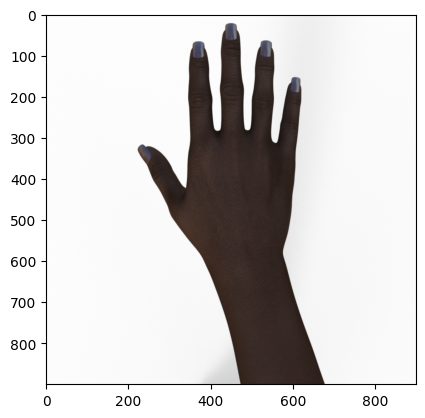

1/1 [==============================] - 0s 14ms/step
[1. 0. 0.]
rps-validation/paper/paper-hires1.png는 보 입니다


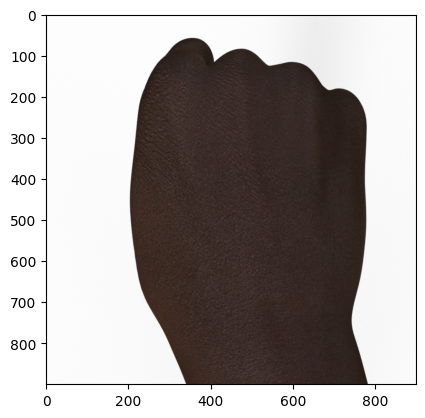

1/1 [==============================] - 0s 15ms/step
[0. 1. 0.]
rps-validation/rocks/rock-hires1.png는 바위 입니다


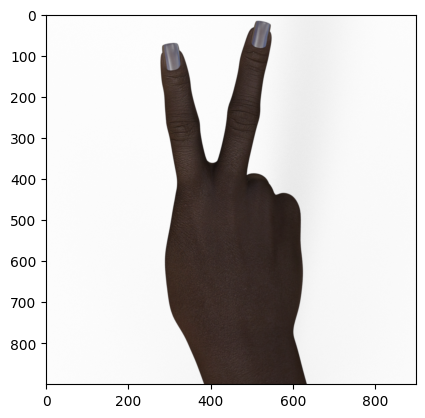

1/1 [==============================] - 0s 14ms/step
[0. 0. 1.]
rps-validation/scissors/scissors-hires1.png는 가위 입니다


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

smaple_images = ['rps-validation/paper/paper-hires1.png', 'rps-validation/rocks/rock-hires1.png', 'rps-validation/scissors/scissors-hires1.png']
rsp_name = ['보', '바위', '가위']
for fn in smaple_images:
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    img = keras.utils.load_img(fn, target_size=(200, 200))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    classes = model26.predict(x)
    print(classes[0])
    idx = np.argmax(classes[0])
    print(fn + '는 {} 입니다'.format(rsp_name[idx]))

흰 배경으로 하니까 잘 알아본다. 

그러나 배경이 초록색인 애로 훈련해서 흰 배경인 애를 예측하던가,

흰 애로 훈련해서 예측하면 결과가 좋지 않게 나온다 왜인지는 모르겠다.

### 드롭아웃

훈련하는 동안 랜덤하게 일부 뉴런을 무시하면 다음 층에 있는 뉴런에 미치는 영향을 일시적으로 막을 수 있다.


드롭아웃은 케라스 층을 추가하면 된다.

tf.keras.Dropout(0.2)